In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
def symbol_to_path(symbol, base_dir="data"):
    return  base_dir + "/{}.csv".format(str(symbol))

def get_data(symbols, dates):
    '''
    Получает цену акций (Adj Close) для данного symbol из CSV файла
    '''
    # Создаем пустой датафрейм и удостоверимся, что SPY будет на первом месте
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', usecols=['Date', 'Adj Close'], parse_dates=True, na_values=['nan']) 
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp, how='inner')
    return df

def plot_df(df, title='Цены на акции'):
    '''Рисует графики цен всего DataFrame'''
    df.plot(title=title, fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()

def plot_selected(df, columns, start_index, end_index):
    '''Рисует графики цен указанных столбцов'''
    df.loc[start_index:end_index, columns].plot(title='Цены на акции', fontsize=11)
    plt.xlabel('Дата')
    plt.ylabel('Цены')
    plt.show()    
    
def normalize_data(df):
    '''Нормализует весь датафрэйм для отображения изменения цен.'''
    df = df / df.iloc[0, :]
    return df

def get_rolling_mean(df, window):
    return df.rolling(window).mean()

def get_rolling_std(df, window):
    return df.rolling(window).std()

def get_Boolinger_bonds(rm, rstd):
    upper_bond = rm + 2 * rstd
    lower_bond = rm - 2 * rstd
    return lower_bond, upper_bond

def get_daily_return(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df / df.shift(1)) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns

In [193]:
def test_run():
    ticks = ['SPY', 'XOM', 'GOOG', 'GLD']
    dates = pd.date_range('2019-01-01', '2019-07-14')
    df = get_data(ticks, dates)
    return df
ticks = ['SPY', 'XOM', 'GOOG', 'GLD']
dates = pd.date_range('2019-06-14', '2019-07-14')

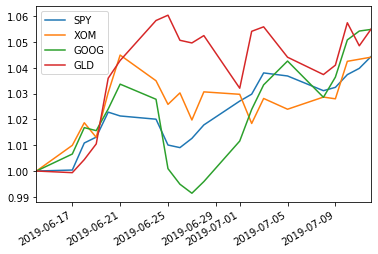

In [194]:
normalize_data(get_data(ticks, dates)).plot();

In [195]:
print('Среднее значение акций за указанный промежуток времени:\n', test_run().mean())

Среднее значение акций за указанный промежуток времени:
 SPY      279.528257
XOM       76.087120
GOOG    1137.401729
GLD      124.014060
dtype: float64


In [196]:
print('Медианное значение акций за указанный промежуток времени:\n', test_run().median())

Медианное значение акций за указанный промежуток времени:
 SPY      281.033142
XOM       76.414108
GOOG    1124.829956
GLD      122.860001
dtype: float64


In [197]:
print('Стандартное отклонение значений акций за указанный промежуток времени:\n', test_run().std())

Стандартное отклонение значений акций за указанный промежуток времени:
 SPY     12.248366
XOM      3.612758
GOOG    57.469392
GLD      3.690113
dtype: float64


### Скользящее среднее. Rolling Mean.

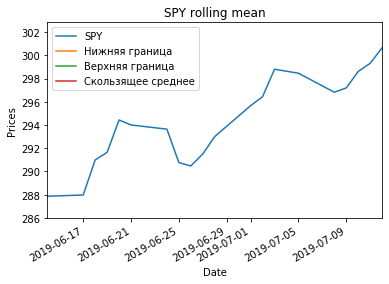

In [198]:
# Берем акции S&P500
df = get_data(ticks, dates)['SPY']
ax = df.plot(title='SPY rolling mean', label='SPY')

# Считаем скользящее по данным с окном в 20 измерений
rm_SPY = get_rolling_mean(df, 20)
lower_bond, upper_bond = get_Boolinger_bonds(rm_SPY, get_rolling_std(df, 20))
lower_bond.plot(label='Нижняя граница')
upper_bond.plot(label='Верхняя граница')
rm_SPY.plot(label='Скользящее среднее')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend();




### Daily returns

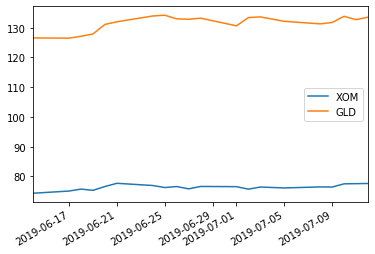

In [205]:
df[['XOM', 'GLD']].plot()

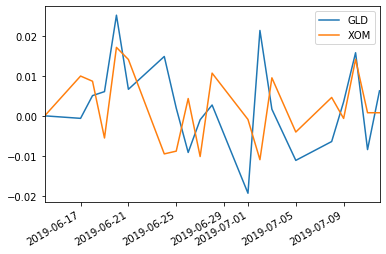

In [208]:
df = get_data(ticks, dates)
returns = get_daily_return(df)[['GLD', 'XOM']].plot()

### Как быть с пропущенными данными?
Распространять вперед последнюю цену и распространять назад первую цену, избегаем интерполяцию.